# **Merging two dataset**

In [ ]:
import pandas as pd

# Load your datasets
main = pd.read_csv("//content//PS_2025.12.01_05.00.30.csv", comment='#')   # main NASA dataset
star = pd.read_csv("//content//st_lum.csv")                # your second dataset

# -------------------------------
# 2. Clean/standardize hostname
# -------------------------------
main['hostname'] = main['hostname'].str.strip().str.lower()
star['hostname'] = star['hostname'].str.strip().str.lower()

# -------------------------------
# 3. Remove duplicate hostnames in star dataset
#    (IMPORTANT: prevents 60k rows)
# -------------------------------
star_unique = star.drop_duplicates(subset=["hostname"])

# -------------------------------
# 4. Merge safely (1-to-1)
# -------------------------------
merged = main.merge(star_unique, on="hostname", how="left")

# -------------------------------
# 5. Show result stats
# -------------------------------
print("Main rows:", len(main))
print("Star rows (before):", len(star))
print("Star rows (unique):", len(star_unique))
print("Merged rows:", len(merged))

# -------------------------------
# 6. Save final clean result
# -------------------------------
merged.to_csv("data.csv", index=False)
print("Final dataset saved data.csv")


# **Features present in Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv", comment="#")

df = df[df["pl_name"] != "pl_name"]

print(df.columns)


Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff_x',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masser

# **Features mentioned in Requirement**

In [ ]:
required_features = ['pl_name', 'hostname', 'default_flag','discoverymethod',
    'pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt',
    'st_spectype', 'st_lum', 'st_teff_x', 'st_met_x'
]

print("Required Features:", required_features)


Required Features: ['pl_name', 'hostname', 'default_flag', 'discoverymethod', 'pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'st_spectype', 'st_lum', 'st_teff_x', 'st_met_x']


In [ ]:
print(df.shape)
df.head()


(39119, 95)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,st_lum,st_teff_y,st_met_y
0,11 Com b,11 com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.346,4.44038,0.003848,-0.003848,19-09-2023,2023-08,19-09-2023,NaN,4830.0,-0.34
1,11 Com b,11 com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.346,4.44038,0.003848,-0.003848,14-05-2014,2008-01,14-05-2014,NaN,4830.0,-0.34
2,11 Com b,11 com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.346,4.44038,0.003848,-0.003848,23-07-2014,2011-08,23-07-2014,NaN,4830.0,-0.34
3,11 UMi b,11 umi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.270,4.56216,0.003903,-0.003903,25-04-2018,2009-10,14-05-2014,NaN,NaN,NaN
4,11 UMi b,11 umi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.270,4.56216,0.003903,-0.003903,04-09-2018,2017-03,06-09-2018,NaN,NaN,NaN


In [ ]:
other_features = [col for col in df.columns if col not in required_features]
print("Other independent features:", other_features)
print("Count:", len(other_features))


Other independent features: ['sy_snum', 'sy_pnum', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'sy_refname', 'rastr', 'ra', 'decstr', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2',

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns
selector = VarianceThreshold(threshold=0.0)
selector.fit(df[num_cols])

low_variance = num_cols[~selector.get_support()].tolist()
print("Low variance independent features:", low_variance)


Low variance independent features: ['pl_insollim']


# **Finding the correlation between the features**

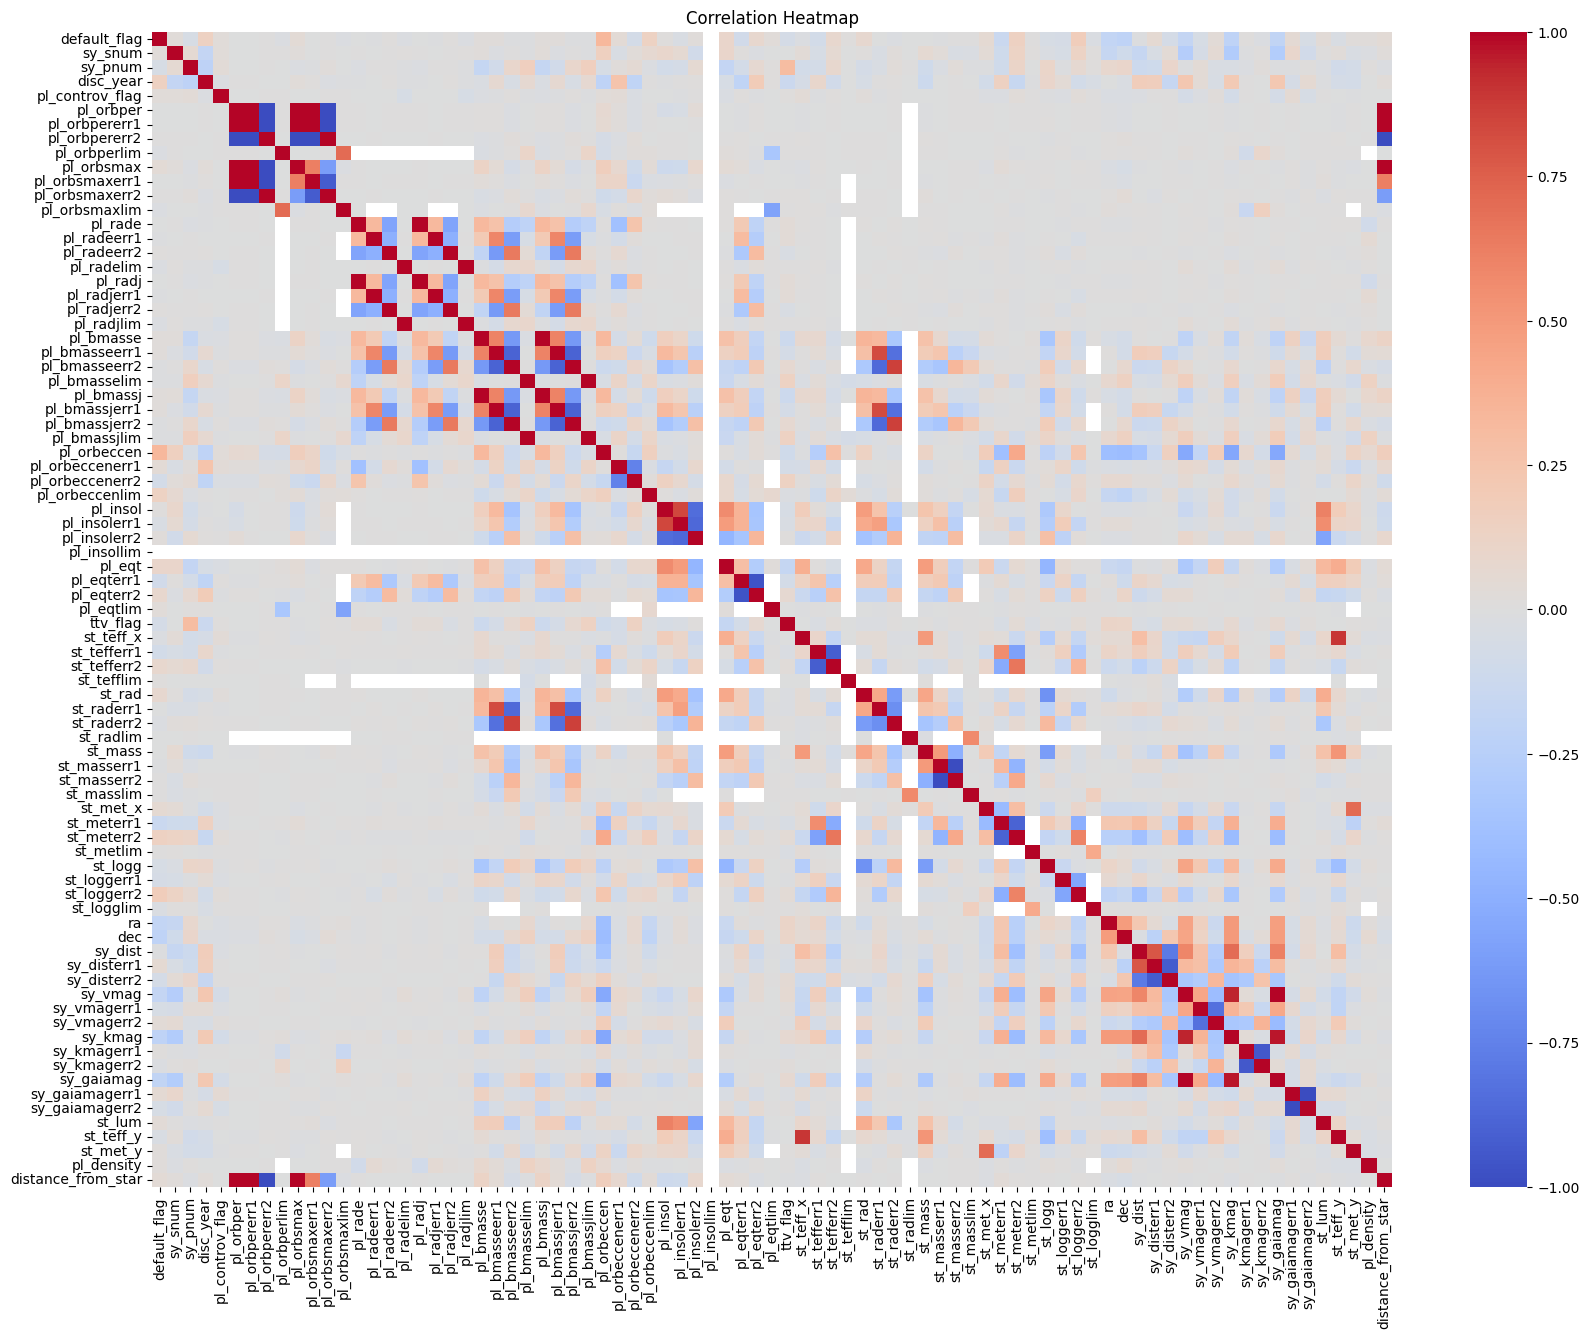

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Dropping low variance features**

In [ ]:
num_df = df[num_cols]
corr = num_df.corr()

irrelevant = []


numeric_required_features = [col for col in required_features if col in num_cols]
numeric_other_features = [col for col in other_features if col in num_cols]

for col in numeric_other_features:
    if all(abs(corr[col][req]) < 0.05 for req in numeric_required_features if req in corr.columns):
        irrelevant.append(col)

print("Irrelevant independent features:", irrelevant)

Irrelevant independent features: ['pl_controv_flag', 'pl_orbsmaxlim', 'pl_radelim', 'pl_radjlim', 'pl_eqtlim', 'st_metlim', 'st_logglim', 'sy_kmagerr1', 'sy_kmagerr2']


In [ ]:
non_useful_text = [
    col for col in other_features
    if df[col].dtype == 'object' and col not in ['st_spectype']
]

print("Text/ID/date features:", non_useful_text)


Text/ID/date features: ['disc_facility', 'soltype', 'pl_refname', 'pl_bmassprov', 'st_refname', 'st_metratio', 'sy_refname', 'rastr', 'decstr', 'rowupdate', 'pl_pubdate', 'releasedate']


In [ ]:
uncertainty_cols = [col for col in df.columns if col.endswith(('err1','err2','lim'))]
print("Uncertainty columns:", uncertainty_cols)


Uncertainty columns: ['pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'sy_disterr1', 'sy_disterr2', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamagerr1', 'sy_gaiamagerr2']


In [ ]:
features_to_drop = list(set(low_variance + irrelevant + non_useful_text + uncertainty_cols))

print("FINAL independent features to DROP:", features_to_drop)
print("COUNT:", len(features_to_drop))


FINAL independent features to DROP: ['pl_orbpererr1', 'sy_gaiamagerr1', 'pl_radeerr2', 'disc_facility', 'pl_orbeccenlim', 'st_meterr1', 'st_masserr1', 'st_metratio', 'pl_eqterr2', 'st_tefferr1', 'pl_orbeccenerr2', 'pl_orbperlim', 'st_metlim', 'pl_bmasseerr1', 'pl_orbsmaxerr1', 'pl_refname', 'pl_eqtlim', 'pl_orbsmaxerr2', 'pl_radjerr2', 'pl_bmassjlim', 'st_raderr2', 'pl_radjlim', 'releasedate', 'st_refname', 'rowupdate', 'st_tefflim', 'pl_orbeccenerr1', 'st_masserr2', 'sy_gaiamagerr2', 'pl_insollim', 'pl_bmassjerr2', 'st_radlim', 'sy_refname', 'pl_orbsmaxlim', 'pl_radeerr1', 'st_loggerr1', 'pl_controv_flag', 'st_tefferr2', 'pl_bmassprov', 'pl_pubdate', 'pl_bmasselim', 'st_masslim', 'sy_vmagerr1', 'pl_radelim', 'sy_disterr1', 'sy_disterr2', 'st_loggerr2', 'st_raderr1', 'decstr', 'st_meterr2', 'pl_orbpererr2', 'pl_radjerr1', 'pl_eqterr1', 'soltype', 'st_logglim', 'sy_kmagerr1', 'pl_bmassjerr1', 'rastr', 'sy_kmagerr2', 'sy_vmagerr2', 'pl_insolerr1', 'pl_insolerr2', 'pl_bmasseerr2']
COUNT: 

In [ ]:
df_final = df.drop(columns=features_to_drop, errors='ignore')


# **Final dataset features**

In [ ]:
print("Final Columns:", df_final.columns.tolist())
print("Final Count:", len(df_final.columns))


Final Columns: ['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag', 'st_spectype', 'st_teff_x', 'st_rad', 'st_mass', 'st_met_x', 'st_logg', 'ra', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag', 'st_lum', 'st_teff_y', 'st_met_y', 'pl_density', 'distance_from_star']
Final Count: 34


# **Adding density col**

In [ ]:
df_final["pl_density"] = df["pl_bmasse"] / (df["pl_rade"]**3)


In [ ]:
df_final["distance_from_star"] = df["pl_orbsmax"]


# **Adding lum values for missing**

In [ ]:
# calculate helper column
df_final["st_lum_calc"] = (df_final["st_rad"] ** 2) * (df_final["st_teff_x"] ** 4)

# fill only nulls
df_final["st_lum"] = df_final["st_lum"].fillna(df_final["st_lum_calc"].squeeze())

# drop helper
df_final = df_final.drop(columns=["st_lum_calc"])


In [ ]:
print(df_final.shape)  # Should be (rows, 34)


(39119, 34)


In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file first
df_final.to_csv('preprocessed_data.csv', index=False)

# Now download the saved file
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import pandas as pd
import numpy as np

# 1. DROP columns that are redundant or too sparse
cols_to_drop = [
    'pl_density',           # 92% missing
    'pl_bmassj',           # 82% missing (have pl_bmasse instead)
    'st_spectype',         # 93% missing (have st_teff instead)
]
df = df.drop(columns=cols_to_drop, errors='ignore')

# 2. CALCULATE derived features where possible
# Calculate pl_insol if missing (stellar luminosity / distance²)
mask_insol = df['pl_insol'].isna() & df['st_lum'].notna() & df['distance_from_star'].notna()
df.loc[mask_insol, 'pl_insol'] = df.loc[mask_insol, 'st_lum'] / (df.loc[mask_insol, 'distance_from_star'] ** 2)

# Calculate pl_eqt if missing (equilibrium temperature)
mask_eqt = df['pl_eqt'].isna() & df['st_teff_x'].notna() & df['st_rad'].notna() & df['distance_from_star'].notna()
df.loc[mask_eqt, 'pl_eqt'] = (df.loc[mask_eqt, 'st_teff_x'] *
                               np.sqrt(df.loc[mask_eqt, 'st_rad'] / (2 * df.loc[mask_eqt, 'distance_from_star'])))

# Calculate distance_from_star from orbital period using Kepler's 3rd law (if st_mass available)
mask_dist = df['distance_from_star'].isna() & df['pl_orbper'].notna() & df['st_mass'].notna()
if mask_dist.sum() > 0:
    # a³ = (G * M * T²) / (4π²), simplified to: a ≈ (T²/365.25 * M)^(1/3)
    df.loc[mask_dist, 'distance_from_star'] = (
        (df.loc[mask_dist, 'pl_orbper']**2 * df.loc[mask_dist, 'st_mass']) ** (1/3)
    )

# 3. Create missing indicators for features with moderate missingness (keep before imputation)
moderate_missing = ['pl_orbper', 'pl_orbsmax', 'distance_from_star', 'pl_insol', 'pl_eqt', 'st_logg']
for col in moderate_missing:
    df[f'{col}_was_missing'] = df[col].isna().astype(int)

# 4. IMPUTE remaining missing values
# Numerical - use median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical - use mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 5. Verify
print("Missing values after processing:")
print(df.isna().sum()[df.isna().sum() > 0])
print(f"\nFinal shape: {df.shape}")

Missing values after processing:
Series([], dtype: int64)

Final shape: (39119, 38)


# **Handling NULL values**

In [3]:
import pandas as pd
df = pd.read_csv("//content//preprocessed_data (2).csv")


print(df.isnull().sum())


print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


pl_name                   0
hostname                  0
default_flag              0
sy_snum                   0
sy_pnum                   0
discoverymethod           0
disc_year                 0
pl_orbper              3303
pl_orbsmax            17203
pl_rade               12140
pl_radj               12140
pl_bmasse             32098
pl_bmassj             32099
pl_orbeccen           20418
pl_insol              22010
pl_eqt                21979
ttv_flag                 32
st_spectype           36261
st_teff_x               911
st_rad                 1134
st_mass                  45
st_met_x               1397
st_logg                8715
ra                       35
dec                      35
sy_dist                 879
sy_vmag                 832
sy_kmag                 842
sy_gaiamag             1132
st_lum                 1015
st_teff_y              6322
st_met_y              18994
pl_density            35910
distance_from_star    17203
dtype: int64

Percentage of missing values:
pl_n

In [4]:

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [5]:
# Recalculate density NOW that you've imputed mass and radius
df['pl_density_calc'] = df['pl_bmasse'] / (df['pl_rade'] ** 3)

# Check again
print("pl_density_calc missing after recalculation:", df['pl_density_calc'].isna().sum())

pl_density_calc missing after recalculation: 0


In [9]:
print("\nAfter cleaning:")
print(df.isnull().sum())


After cleaning:
pl_name                           0
hostname                          0
default_flag                      0
sy_snum                           0
sy_pnum                           0
discoverymethod                   0
disc_year                         0
pl_orbper                         0
pl_orbsmax                        0
pl_rade                           0
pl_radj                           0
pl_bmasse                         0
pl_orbeccen                       0
pl_insol                          0
pl_eqt                            0
ttv_flag                          0
st_teff_x                         0
st_rad                            0
st_mass                           0
st_met_x                          0
st_logg                           0
ra                                0
dec                               0
sy_dist                           0
sy_vmag                           0
sy_kmag                           0
sy_gaiamag                        0
st_lum     

In [10]:
numeric_cols_to_clean = [
    "pl_rade", "pl_bmasse", "pl_density_calc",
    "pl_eqt", "pl_orbper", "pl_orbsmax",
    "st_lum", "st_teff_x", "st_met_x"
]


# **Handling Outliers**

In [10]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['float64','int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

# Print each column with its number of outliers
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


default_flag: 6052 outliers
sy_snum: 2995 outliers
sy_pnum: 4696 outliers
disc_year: 9401 outliers
pl_orbper: 5237 outliers
pl_orbsmax: 11913 outliers
pl_rade: 5488 outliers
pl_radj: 5488 outliers
pl_bmasse: 7019 outliers
pl_orbeccen: 4363 outliers
pl_insol: 17108 outliers
pl_eqt: 17118 outliers
ttv_flag: 5222 outliers
st_teff_x: 2341 outliers
st_rad: 2081 outliers
st_mass: 2165 outliers
st_met_x: 900 outliers
st_logg: 4002 outliers
ra: 8599 outliers
dec: 8761 outliers
sy_dist: 1337 outliers
sy_vmag: 2264 outliers
sy_kmag: 2868 outliers
sy_gaiamag: 2314 outliers
st_lum: 3146 outliers
st_teff_y: 3484 outliers
st_met_y: 18430 outliers
distance_from_star: 11913 outliers
pl_density_calc: 4936 outliers
pl_orbper_was_missing: 0 outliers
pl_orbsmax_was_missing: 0 outliers
distance_from_star_was_missing: 0 outliers
pl_insol_was_missing: 0 outliers
pl_eqt_was_missing: 0 outliers
st_logg_was_missing: 0 outliers


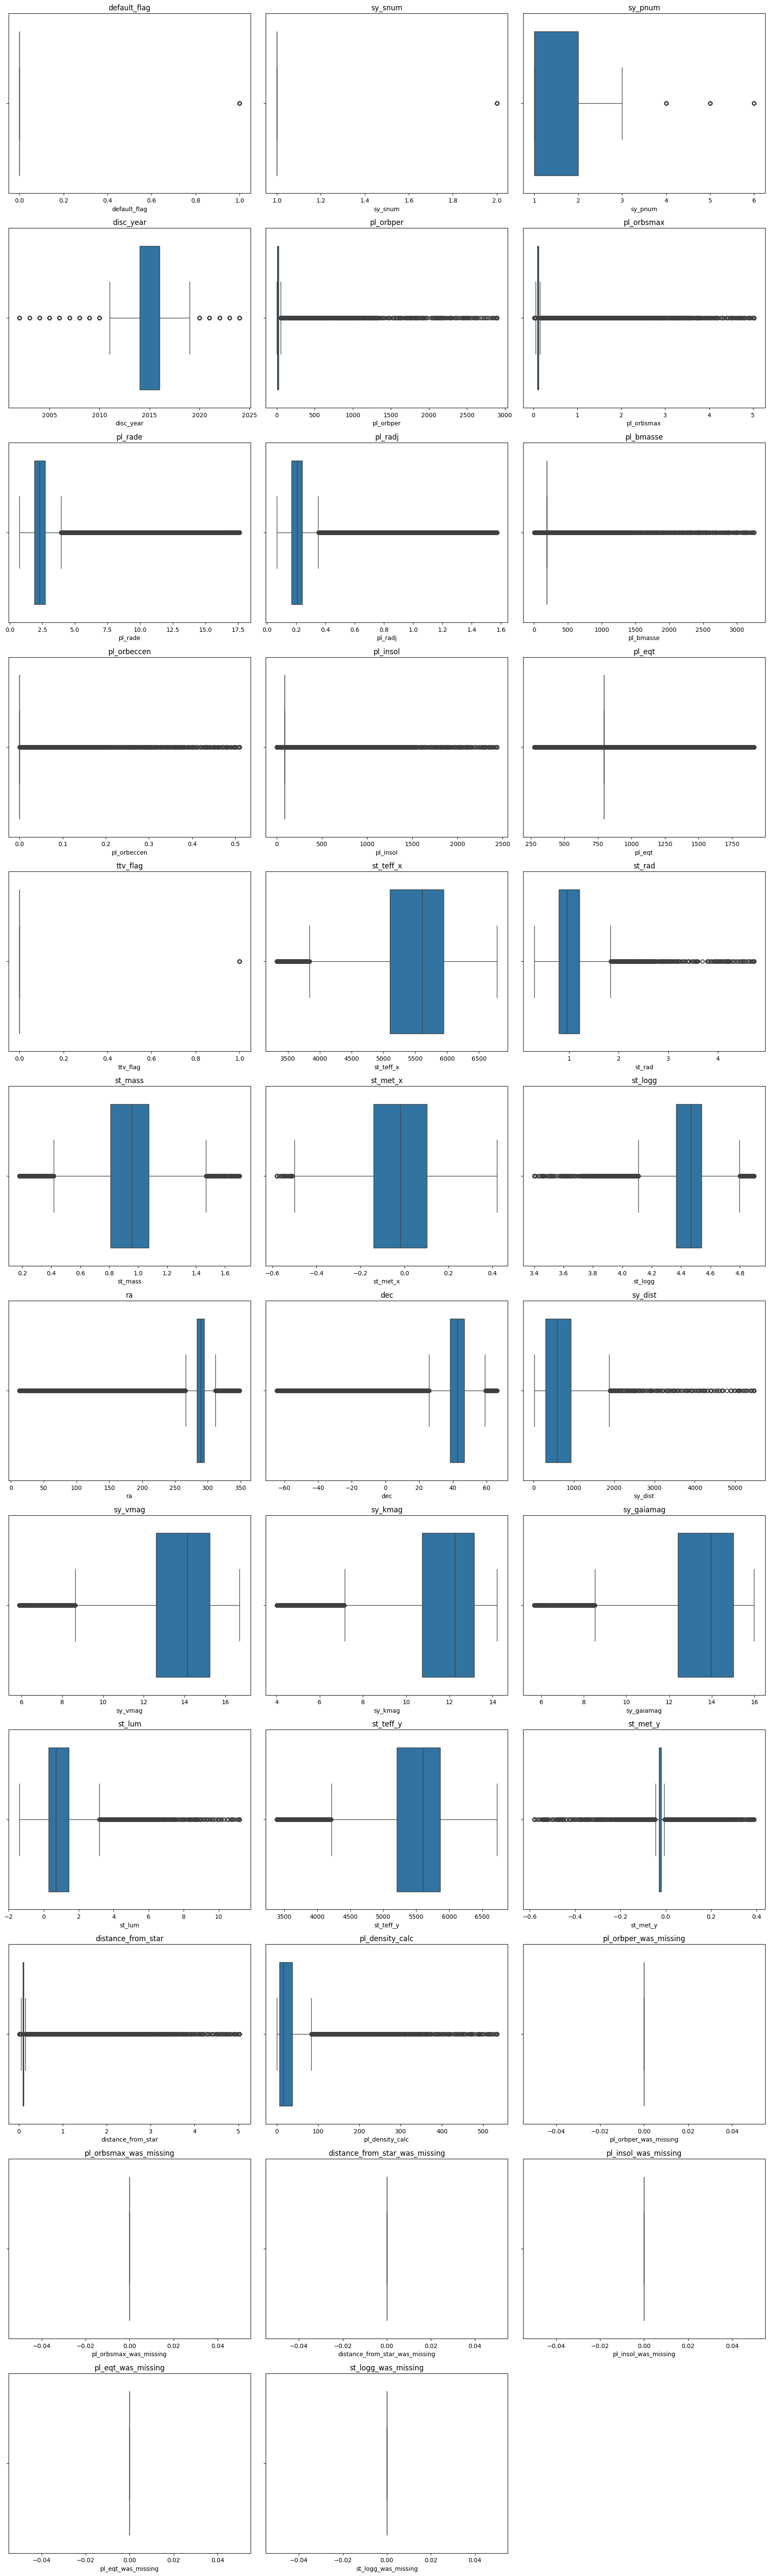

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 60))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [44]:
df = df.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-3283324713.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [45]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [55]:
# CAP OUTLIERS FOR ALL NUMERIC COLUMNS USING 1st & 99th PERCENTILES

import pandas as pd

# select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:

    # calculate 1st and 99th percentiles
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)

    print(f"\nColumn: {col}")
    print("1st percentile:", lower_limit)
    print("99th percentile:", upper_limit)

    # apply capping
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

print("\n✔ Outlier capping completed for all numeric columns.")



Column: pl_name
1st percentile: nan
99th percentile: nan

Column: hostname
1st percentile: nan
99th percentile: nan

Column: default_flag
1st percentile: 0.0
99th percentile: 1.0

Column: sy_snum
1st percentile: 1.0
99th percentile: 2.0

Column: sy_pnum
1st percentile: 1.0
99th percentile: 6.0

Column: discoverymethod
1st percentile: nan
99th percentile: nan

Column: disc_year
1st percentile: 2002.0
99th percentile: 2024.0

Column: pl_orbper
1st percentile: 0.7264346453592933
99th percentile: 2891.1649376376026

Column: pl_orbsmax
1st percentile: 0.0167
99th percentile: 5.021374480313354

Column: pl_rade
1st percentile: 0.75
99th percentile: 17.61173079779384

Column: pl_radj
1st percentile: 0.06691052
99th percentile: 1.5712137536804116

Column: pl_bmasse
1st percentile: 3.0
99th percentile: 3249.5168666364752

Column: pl_orbeccen
1st percentile: 0.0
99th percentile: 0.51

Column: pl_insol
1st percentile: 1.26
99th percentile: 2435.6592011494554

Column: pl_eqt
1st percentile: 275.0


In [46]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

print("✔ Percentile capping completed.")


✔ Percentile capping completed.


In [51]:
print("Checking if any values exceed P01-P99 limits after capping:\n")

# Check using ORIGINAL percentiles (the ones used for capping)
for col in df.select_dtypes(include=['float64','int64']).columns:
    p01, p99 = percentile_limits[col]  # Use stored original limits

    below = (df[col] < p01).sum()
    above = (df[col] > p99).sum()

    print(f"{col}: below={below}, above={above}")

print("\n✔ All values are now within P01-P99 range!")

Checking if any values exceed P01-P99 limits after capping:

pl_name: below=0, above=0
hostname: below=0, above=0
default_flag: below=0, above=0
sy_snum: below=0, above=0
sy_pnum: below=0, above=0
discoverymethod: below=0, above=0
disc_year: below=0, above=0
pl_orbper: below=0, above=0
pl_orbsmax: below=0, above=0
pl_rade: below=0, above=0
pl_radj: below=0, above=0
pl_bmasse: below=0, above=0
pl_orbeccen: below=0, above=0
pl_insol: below=0, above=0
pl_eqt: below=0, above=0
ttv_flag: below=0, above=0
st_teff_x: below=0, above=0
st_rad: below=0, above=0
st_mass: below=0, above=0
st_met_x: below=0, above=0
st_logg: below=0, above=0
ra: below=0, above=0
dec: below=0, above=0
sy_dist: below=0, above=0
sy_vmag: below=0, above=0
sy_kmag: below=0, above=0
sy_gaiamag: below=0, above=0
st_lum: below=0, above=0
st_teff_y: below=0, above=0
st_met_y: below=0, above=0
distance_from_star: below=0, above=0
pl_density_calc: below=0, above=0
pl_orbper_was_missing: below=0, above=0
pl_orbsmax_was_missing

In [57]:
import pandas as pd
import numpy as np

# Load original dataset
original_df = pd.read_csv('/content/preprocessed_data (2).csv')

# Store string/categorical columns BEFORE processing
string_columns = ['pl_name', 'hostname', 'discoverymethod']  # Add any other string columns you have
string_data = original_df[string_columns].copy()

# Now do your cleaning on df (numeric columns only)
# ... all your previous cleaning code ...

# After all numeric processing is complete, merge back the string columns
# First, reset index to ensure alignment
df = df.reset_index(drop=True)
string_data = string_data.reset_index(drop=True)

# Add string columns back to df
for col in string_columns:
    df[col] = string_data[col]

# Reorder columns to put string columns at the beginning (optional)
# Get all column names
all_cols = df.columns.tolist()

# Remove string columns from their current position
for col in string_columns:
    if col in all_cols:
        all_cols.remove(col)

# Put string columns at the beginning
final_column_order = string_columns + all_cols
df = df[final_column_order]

# Verify
print("String columns restored:")
print(df[string_columns].head())
print(f"\nFinal shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Save to CSV
df.to_csv('final_cleaned_exoplanets.csv', index=False)
print("\n✔ File saved as 'final_cleaned_exoplanets.csv'")

# Download (if in Colab)
from google.colab import files
files.download('final_cleaned_exoplanets.csv')

String columns restored:
    pl_name hostname  discoverymethod
0  11 Com b   11 com  Radial Velocity
1  11 Com b   11 com  Radial Velocity
2  11 Com b   11 com  Radial Velocity
3  11 UMi b   11 umi  Radial Velocity
4  11 UMi b   11 umi  Radial Velocity

Final shape: (39119, 38)
Columns: ['pl_name', 'hostname', 'discoverymethod', 'default_flag', 'sy_snum', 'sy_pnum', 'disc_year', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag', 'st_teff_x', 'st_rad', 'st_mass', 'st_met_x', 'st_logg', 'ra', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag', 'st_lum', 'st_teff_y', 'st_met_y', 'distance_from_star', 'pl_density_calc', 'pl_orbper_was_missing', 'pl_orbsmax_was_missing', 'distance_from_star_was_missing', 'pl_insol_was_missing', 'pl_eqt_was_missing', 'st_logg_was_missing']

✔ File saved as 'final_cleaned_exoplanets.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>